In [3]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from pyclustering.cluster import kmedoids
import numpy as np
import warnings
warnings.filterwarnings('ignore')

hannanum = Hannanum()

Data = pd.read_csv('군집분석데이터.csv', encoding='cp949')

Data.tail()

,검색어,기사내용
10,복면가왕 왕밤빵,복면가왕’ 88대 가왕 자리는 2연승의 왕밤빵이 차지했다.\r\n\r\n4일 오후 ...
11,복면가왕 왕밤빵,복면가왕'에 출연해 왕밤빵에 패하면서 얼굴을 공개한 '축음기' 천단비에 관심이 쏠리...
12,복면가왕 왕밤빵,"지난 4일 방송된 MBC ‘복면가왕’에서는 왕밤빵에 맞서 축음기, 조커, 북극곰 버..."
13,복면가왕 왕밤빵,복면가왕' 왕밤빵의 정체가 더욱더 오리무중에 빠졌다. \r\n\r\n4일 방송된 M...
14,복면가왕 왕밤빵,복면가왕' 왕밤빵이 첫 방어전에 성공하며 2연승을 차지했다.\r\n지난 4일 방송된...


In [4]:
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

docs[:5]

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성',
 '유한양행 1조4000억원 규모 기술이전 계약 체결 소식 가격제한폭 5일 오전 9시 3분 유한양행 전날 5만3000원(29. 78 23만1000원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨앤존슨(J&J) 자회사 얀센 바이오테크(Janssen 저해제 ‘레이저티닙’(프로젝트명 YH25448) 기술수출 계약 체결 이날 계약규모 약 1조4000억원(12억5500만달러) 반환 의무 계약금 560억원(5000 이번 계약 얀센 전세계 레이저티닙 개발 제조 상업화 독점적 권리 국내 개발 상업화 권리 유한양행 유 유한양행 얀센 바이오텍 내년 레이저티닙 단일요법 병용요법 글로벌 임상시험 공동 진행 예정 유한양행 개발 허가 상업화 성공 단계별 마일스톤 기술료 12억500 달러(약 1조3500억원 수 임상시험 허가 상업화 실패 경우 기술이전 계약 종료 경우 유한양행 얀센 측 지급 위약금',
 '유한양행 다국적 제약사 얀센 기술수출 소식 주가 5일 장 초반 상한가 유한양행 이날 오전 9시 5분 현재 유가증권시장 전 거래일 5만3000원(29. 78 23만1000원 거래 유한양행 얀센 바이오테크 상피세포 성장 자 수용체 표적 항암 치료제 기술 이전 계약 체결 이날 장 개장 전 공시 이번 계약금 5000 개발 상업화 단계별 기술료(마일스톤) 12억500 달러 기술수출 규모 12억5500 달러(약 1조4000억원 서근희 삼성증권 연구원 유한양행 이번 기술수출 계약 소식 한미약품 이후 기술 이전 계약 투자자들 갈증 해소 전망 "한미약품 사노피 기술 이전 계약 체결 이후 2번 계약 규모 말',
 '유한양행 얀센 바이오테크((Janssen 상피세포

In [5]:
vec = CountVectorizer() # 빈도기반
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

df.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
from sklearn.metrics import silhouette_score
max_score = 0
optimized_n = 0
for k in range(2,10):
   
    km = KMeans(n_clusters=k,random_state=2).fit(df)
   
    s_score = silhouette_score(df,km.labels_)
    if s_score > max_score:
        max_score = s_score
        optimized_n = k
    print("score for %d clusters:%.3f" % (k, s_score))
    
print(f'\n 최적의 클러스터개수: {optimized_n}, silhouette 점수: {max_score}')

score for 2 clusters:0.184
score for 3 clusters:0.207
score for 4 clusters:0.190
score for 5 clusters:0.161
score for 6 clusters:0.136
score for 7 clusters:0.151
score for 8 clusters:0.127
score for 9 clusters:0.126

 최적의 클러스터개수: 3, silhouette 점수: 0.20708756559225502


In [7]:
kmeans = KMeans(n_clusters=3).fit(df)


print(kmeans.labels_)

[2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


In [8]:
Data['검색어']

0         유한양행
1         유한양행
2         유한양행
3         유한양행
4         유한양행
5           라돈
6           라돈
7           라돈
8           라돈
9           라돈
10    복면가왕 왕밤빵
11    복면가왕 왕밤빵
12    복면가왕 왕밤빵
13    복면가왕 왕밤빵
14    복면가왕 왕밤빵
Name: 검색어, dtype: object

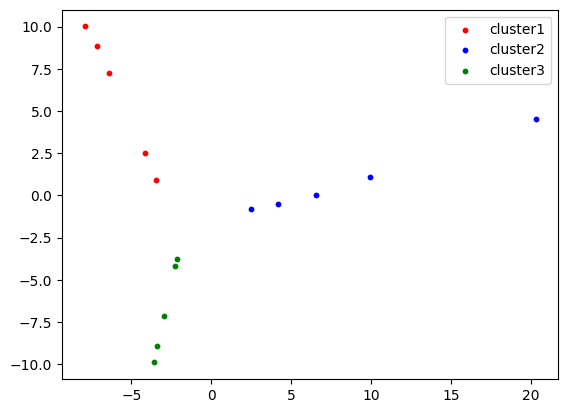

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.index=Data['검색어']

kmeans.labels_ == 0

# x축 : first y출 : second 번호로 나타낸후 plot으로 시각화
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()
plt.show()